# Eigenfaces:  Principal Component Analysis and Dimensionality Reduction



### Daniel Nghiem
### Mathematics Instructor, Foothill College

# Loading the dataset of faces
-  Taken from AT&T Laboratories Cambridge: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.htmlTen 

- Different images of each of 40 distinct subjects
-  Some images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). 
-  All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

In [22]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline 

# For my reference:  To turn jupyter notebook into slides, type in terminal:
# jupyter nbconvert Eigenface\ notebook.ipynb --to slides --post serve



In [23]:
# Load face images and their target labels
# Images are from AT&T Laboratories Cambridge
# http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

dataset = sklearn.datasets.fetch_olivetti_faces()

faces_data = dataset.data
faces_images = dataset.images
target = dataset.target

target_classes = np.unique(target)



In [24]:
print(faces_images.shape)
print(faces_data.shape)
print(target_classes)


(400, 64, 64)
(400, 4096)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


[[0.2107438  0.20661157 0.19421488 ... 0.38842976 0.16115703 0.09917355]
 [0.21487603 0.2107438  0.18595041 ... 0.62396693 0.30578512 0.10743801]
 [0.2231405  0.2107438  0.1983471  ... 0.78512394 0.5123967  0.19008264]
 ...
 [0.2107438  0.2107438  0.21487603 ... 0.54545456 0.39256197 0.21487603]
 [0.2107438  0.2107438  0.21487603 ... 0.5371901  0.38016528 0.21900827]
 [0.2107438  0.21487603 0.21487603 ... 0.54545456 0.35950413 0.21900827]]


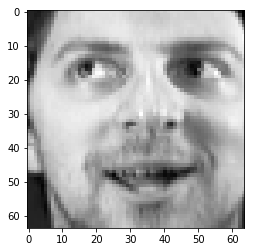

In [25]:
# Here is an example image in array (matrix) form.  Pixel values are
# within the range [0, 1], where 0 is black and 1 is white.

im = faces_images[65]
print (im)

# And in image form
fig = plt.figure(figsize=(4,4))
plt.imshow(im, cmap='gray')


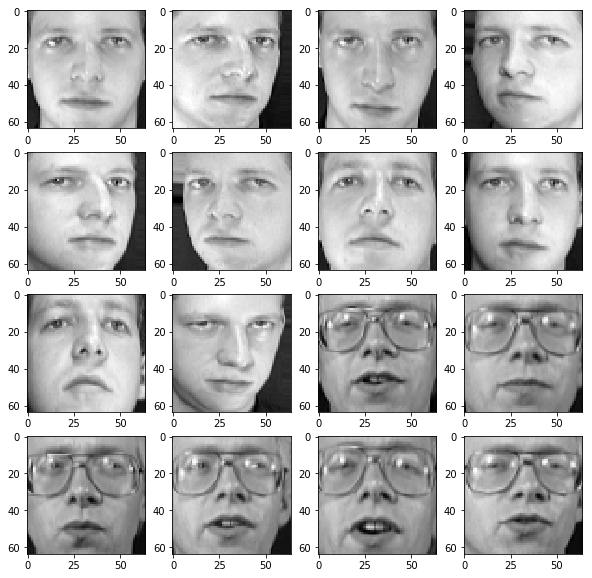

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    im = faces_images[i].reshape(64,64)
    ax.imshow(im, cmap='gray')

# Applying Principal Component Analysis

![pcanim](https://i.stack.imgur.com/Q7HIP.gif)

Diagram taken from https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

In [27]:
# From https://www.kaggle.com/lalitharajesh/face-recognition-eigenfaces/code

from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [28]:

X = faces_images.reshape(faces_images.shape[0], faces_images.shape[1]*faces_images.shape[2])

n_samples = faces_images.shape[0]
n_features = X.shape[1]


In [29]:
# Split the image data into training and testing sets using 
# a 80%-20% split.

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, target, test_size=0.2, random_state=34
    )

print("Number of samples: %d" % n_samples)
print("Number of features (pixels): %d" % n_features)
print("Number of classes: %d" % len(target_classes))
print(" ")
print("Length of Xtrain:",len(Xtrain))
print("Length of Xtest:",len(Xtest))
print("Length of ytrain:",len(ytrain))
print("Length of ytest:",len(ytest))

Number of samples: 400
Number of features (pixels): 4096
Number of classes: 40
 
Length of Xtrain: 320
Length of Xtest: 80
Length of ytrain: 320
Length of ytest: 80


# Looking at the Xtrain images
-  A random sample of the original 400 images that represent 40 people
-  Slight variation of facial expressions for each person

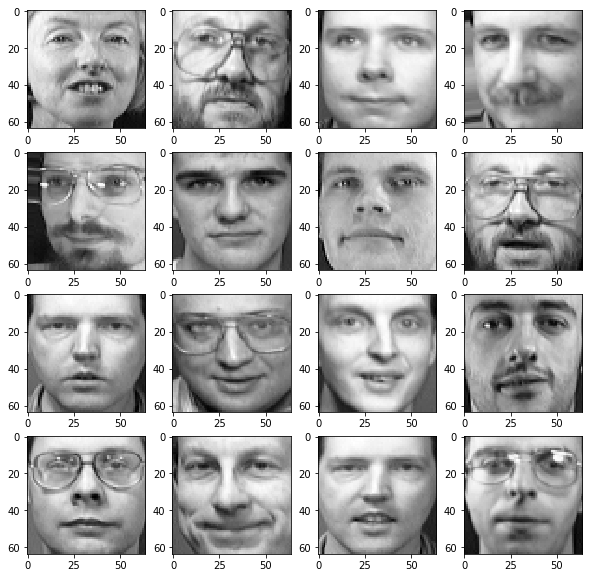

In [30]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    im = Xtrain[i].reshape(64,64)
    ax.imshow(im, cmap='gray')

# Step 1:  Subtract the mean face to center the image data

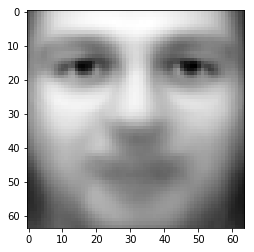

In [31]:
mean_face = Xtrain.sum(axis=0) / Xtrain.shape[0]

fig = plt.figure(figsize=(4,4))
plt.imshow(mean_face.reshape(64,64), cmap='gray')


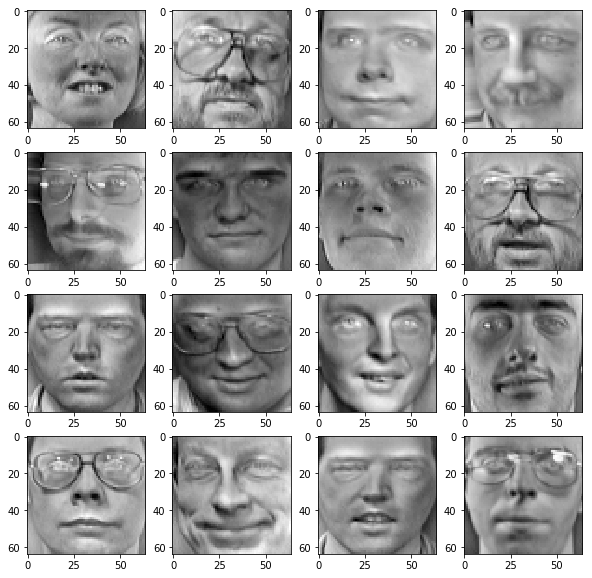

In [32]:
Xtrain_centered = Xtrain.reshape(320, 64, 64) - mean_face.reshape(64,64)

fig, axes = plt.subplots(4, 4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(Xtrain_centered[i], cmap='gray')
    

# Step 2:  Create the Covariance Matrix

-The sample covariance of two ramdom variables is defined by 

$Cov(X,Y) = \dfrac{1}{n-1}\Sigma(X-\overline{X})(Y-\overline{Y})$

where $\overline{X}$ and $\overline{Y}$ are the sample averages of $X$ and $Y$, respectively.


-The 2x2 covariance matrix is given by 
\begin{bmatrix}
    Cov(X,X)       & Cov(X,Y)  \\
    Cov(Y,X)       & Cov(Y,Y)
\end{bmatrix}

-If the matrix $B$ has columns of the form $x^{(i)} - \overline{x}$, where $x^{(i)}$ is feature vector with length `n_features`, and $\overline{x}$ is the average of all feature vectors, then $\dfrac{1}{n-1}B^tB$ is an $n $ x $n$ covariance matrix for all the features in the data.



In [33]:
reshaped = Xtrain_centered.reshape(320, -1)

covariance = 1.0/320*np.dot(np.transpose(reshaped), reshaped)

print(covariance.shape)

(4096, 4096)


In [34]:
print(covariance)

[[ 0.03368146  0.03306596  0.02905007 ... -0.00647864 -0.006857
  -0.0050996 ]
 [ 0.03306596  0.03662741  0.0345464  ... -0.00933044 -0.00971731
  -0.00758052]
 [ 0.02905007  0.0345464   0.03840467 ... -0.01285922 -0.01285958
  -0.01062425]
 ...
 [-0.00647864 -0.00933044 -0.01285922 ...  0.03569047  0.03267775
   0.02934766]
 [-0.006857   -0.00971731 -0.01285958 ...  0.03267775  0.03488625
   0.03236958]
 [-0.0050996  -0.00758052 -0.01062425 ...  0.02934766  0.03236958
   0.03372112]]


# Step 3: Diagonalize the covariance matrix and find all eigenvectors

In [20]:
from numpy.linalg import eig

evalues, evectors = eig(covariance)    # The evectors is a matrix whose columns
                                       # are the eigenvectors of the covariance matrix.

print(evalues)
print(evectors.shape)


[ 1.8109640e+01  1.1491779e+01  5.9183760e+00 ... -1.5440075e-09
 -1.5036233e-09 -3.6865864e-09]
(4096, 4096)


(4096,)


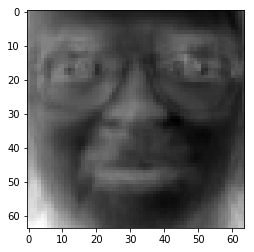

In [21]:
# Display the first eigenvector...call it an Eigenface!

v = evectors[:,0]
print(v.shape)

fig = plt.figure(figsize=(4,4))
plt.imshow(v.reshape(64,64), cmap='gray')

# If you don't want to do linear algebra...

In [90]:

from sklearn.decomposition import PCA


In [91]:
from sklearn.decomposition import PCA

'''
Compute a PCA (eigenfaces) on the dataset (treated as unlabeled
dataset): unsupervised feature extraction / dimensionality reduction
'''

n_components = 200    # number of components (eigenvectors to keep)

print("Extracting the top %d eigenfaces from %d faces..."
      % (n_components, Xtrain.shape[0]))
t0 = time()


pca_faces = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(Xtrain)


print("Done in %0.3fs." % (time() - t0))



Extracting the top 200 eigenfaces from 320 faces...
Done in 0.172s.


In [83]:
top_eigenvalues = pca_faces.explained_variance_[:10]   # First 10 eigenvalues of the covariance matrix

print(top_eigenvalues)
print('')
print(pca_faces.explained_variance_ratio_[:10]) 





[18.166397  11.527807   5.9369254  3.993751   2.9124556  2.5541663
  1.9017898  1.6178155  1.6062157  1.400399 ]

[0.23130526 0.14677882 0.07559243 0.05085079 0.0370831  0.03252115
 0.02421471 0.02059898 0.02045128 0.0178307 ]


## From Faces to an Eigenface Representation

In [84]:
def normed_image(a):
    return (a - a.min())/(a.max() -a.min())

def get_normed_component(pc, j):
    size = 64*64
    g = pc.components_[j][0:size]
    g = normed_image(g)
    return g

def display_component(pc, j):
    g = get_normed_component(pc,j)
    print(g.shape)
    plt.imshow(g.reshape(64, 64), cmap='gray')
    plt.xticks([])
    plt.yticks([])

# Eigenfaces, ordered by eigenvalue

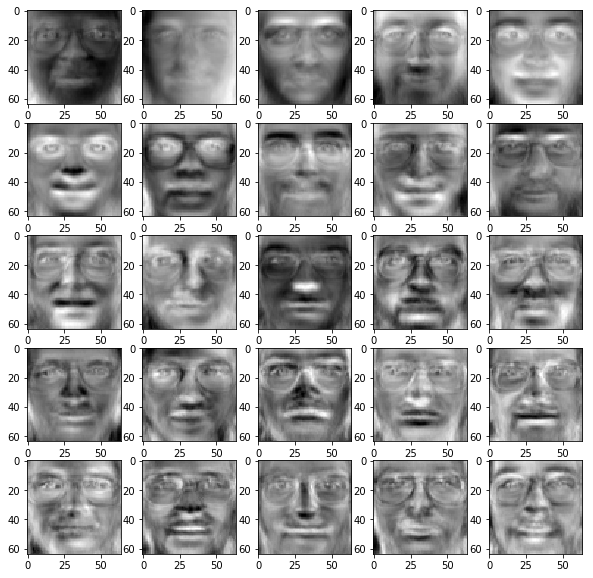

In [85]:
# Display the first several principal components

fig, axes = plt.subplots(5, 5, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    eigenface = get_normed_component(pca_faces, i)
    ax.imshow(eigenface.reshape(64,64), cmap='gray')

# Significance of the 190th eigenface?

(4096,)


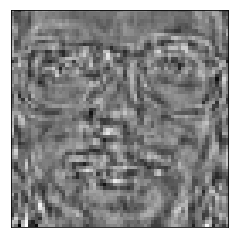

In [86]:
fig = plt.figure(figsize=(4,4))
display_component(pca_faces, 190)

# A Face as a Linear Combination of Eigenfaces

In [6]:
test_face = Xtest[32]   # This face was NOT in our training set!

fig = plt.figure(figsize=(4,4))
plt.imshow(test_face.reshape(64,64), cmap='gray')



NameError: name 'Xtest' is not defined

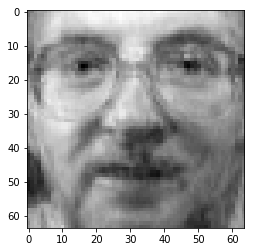

In [88]:
# Approximate a new face using the mean face and Eigenfaces

eigenfaces = pca_faces.components_

im_vector = test_face

approximation = mean_face

for i in range(len(eigenfaces)):
    weight = np.dot(test_face, eigenfaces[i])    
    approximation += eigenfaces[i] * weight

fig = plt.figure(figsize=(4,4))
plt.imshow(approximation.reshape(64,64), cmap='gray')

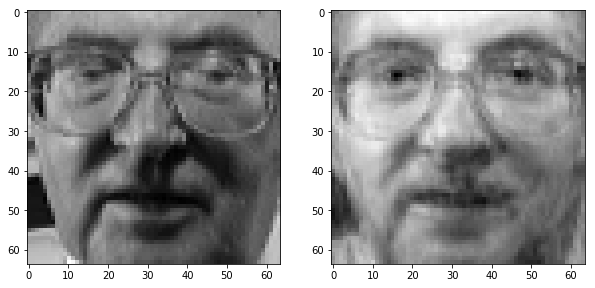

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))

axes[0].imshow(test_face.reshape(64,64), cmap='gray')
axes[1].imshow(approximation.reshape(64,64), cmap='gray')

# Further use cases to be researched:
 - Using PCA and classification algorithms for facial detection
 - Using Eigenfaces as image compression


# Resources and further reading:
 - "Principal Component Analysis Explained Visually" http://setosa.io/ev/principal-component-analysis/
 - Math $\cup$ Programming:  https://jeremykun.com/2011/07/27/eigenfaces/
 - "Principal Component Analysis with Linear Algebra" by Jauregui, Jeff. http://www.math.union.edu/~jaureguj/PCA.pdf
 - "An Introduction to Statistical Learning (with Applications in R)" by James, Witten, Hastie, Tibshirani. http://www-bcf.usc.edu/~gareth/ISL/

# Thanks for staying!